In [71]:
import pandas as pd
import random
from copy import deepcopy
from scipy.linalg import svd, diagsvd
import numpy as np
import matplotlib.pyplot as plt

In [161]:
df = pd.read_csv('dados/ratings_small.csv')
df.drop(columns=["timestamp"], inplace=True)
df = df.pivot(index=["userId"], columns=["movieId"])
# df.fillna(2.5, inplace=True)
A = df.to_numpy()
df

rating                                                                 \
movieId 1      2      3      4      5      6      7      8      9      10       
userId                                                                          
1          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    4.0   
3          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    4.0   
5          NaN    NaN    4.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
667        NaN    NaN    NaN    NaN    NaN    4.0    NaN    NaN    NaN    NaN   
668        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
669        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
670        4.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
671        5.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

         ...                                                                 \
movieId  ... 161084 161155 161594 161830 161918 161944 162376 162542 162672   
userId   ...                                                                  
1        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
667      ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
668      ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
669      ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
670      ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
671      ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                
movieId 163949  
userId          
1          NaN  
2          NaN  
3          NaN  
4          NaN  
5          NaN  
...        ...  
667        NaN  
668        NaN  
669        NaN  
670        NaN  
671        NaN  

[671 rows x 9066 columns]

In [190]:
print(df.iloc[1][df.iloc[1].notnull()])
print(df.iloc[1][589])

if df.isnull().iloc[1][589]:
    print("A")

        movieId
rating  10         4.0
        17         5.0
        39         5.0
        47         4.0
        50         4.0
                  ... 
        592        5.0
        593        3.0
        616        3.0
        661        4.0
        720        4.0
Name: 2, Length: 76, dtype: float64
nan
A


In [193]:
ind = []
while len(ind) < 1000:
    i,j = random.randint(0,670), random.randint(0,9065)
    if not df.isnull().iloc[i][j]:
        ind.append((i,j))

print(ind)
for i,j in ind:
    print(df.iloc[i][j])

[(22, 522), (503, 1448), (218, 2754), (624, 7051), (117, 1100), (94, 1125), (137, 4417), (76, 6278), (261, 4262), (429, 1744), (406, 3810), (532, 522), (294, 2063), (441, 100), (604, 1072), (47, 6039), (623, 8436), (421, 522), (528, 2195), (547, 37), (661, 129), (78, 2147), (467, 6136), (47, 7494), (664, 302), (129, 1359), (524, 1024), (604, 2777), (311, 1728), (253, 487), (429, 2254), (284, 1553), (174, 87), (198, 6814), (524, 1798), (22, 1012), (311, 2212), (72, 1217), (14, 969), (504, 4908), (623, 4603), (261, 5605), (562, 8007), (82, 1367), (383, 4606), (82, 2541), (451, 464), (284, 1599), (626, 1391), (112, 83), (545, 2374), (164, 2338), (487, 6534), (124, 4164), (441, 2934), (426, 8412), (293, 3554), (14, 391), (76, 4304), (528, 5668), (66, 525), (451, 5381), (103, 6708), (129, 1916), (181, 10), (535, 159), (666, 322), (431, 1615), (231, 1848), (387, 1273), (327, 3999), (552, 5903), (462, 1568), (520, 725), (118, 849), (456, 7315), (513, 906), (108, 891), (299, 2026), (194, 2453)

In [137]:
# p = []
# for i in range(20,30):
#     # i = random.randint(0,100000)
#     ind = df.iloc[i]
#     p.append((int(ind["userId"])-1, int(ind["movieId"])-1))
# print(p)

[(1, 9), (1, 16), (1, 38), (1, 46), (1, 49), (1, 51), (1, 61), (1, 109), (1, 143), (1, 149)]


In [154]:
# df = df.pivot(index=["userId"], columns=["movieId"])
# # df_ = pd.pivot_table(data = df, index = 'userId', columns ='movieId', values = 'rating',aggfunc='mean')
# df.fillna(-1, inplace=True)
# A = df.to_numpy()
# df

KeyError: "None of ['userId', 'movieId'] are in the columns"

In [149]:
# for i,j in p:
#     print(df.iloc[i][j])

print(df.iloc[1][49])

3.0


In [76]:
ind = [(random.randint(0,670), random.randint(0,9065)) for i in range(1000)]

In [77]:
B = deepcopy(A)
for i,j in ind:
    B[i][j] = random.randint(0,5)

In [78]:
# for i,j in ind:
#     print(f'A: {A[i][j]}')
#     print(f'B: {B[i][j]}')

In [79]:
X, Y, Z = svd(B)

In [80]:
Y[-300:] = 0
sigma = diagsvd(Y, B.shape[0], B.shape[1])
B = X @ sigma @ Z

In [81]:
# for i,j in ind:
#     print(f'A: {A[i][j]}')
#     print(f'B: {B[i][j]}')

In [82]:
avaliacao_real = np.array([A[i][j] for i,j in ind])
avaliacao_calc = np.array([B[i][j] for i,j in ind])
erro = avaliacao_real - avaliacao_calc

In [83]:
media = np.mean(erro)
desvio_padrao = np.std(erro)
x = np.linspace(min(erro), max(erro), 100)
curva_normal = 1/(desvio_padrao * np.sqrt(2*np.pi)) * np.exp(-(x-media)**2 / (2*desvio_padrao**2))

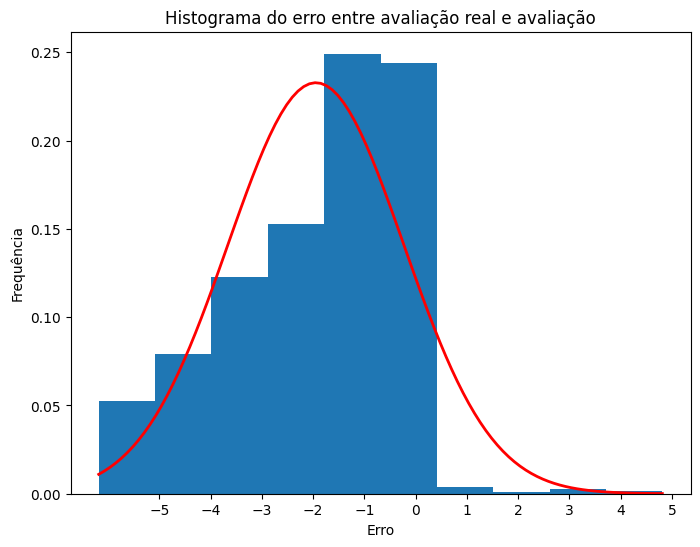

In [84]:
plt.figure(figsize=(8,6))
plt.hist(erro, bins=10, density=True)
plt.plot(x, curva_normal, 'r', linewidth=2)
plt.xlabel('Erro')
plt.ylabel('Frequência')
plt.xticks(np.arange (-5, 5.1, 1))
plt.title('Histograma do erro entre avaliação real e avaliação')
plt.show()